## Import all the library required library files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

## statistics about weather dataset

In [2]:
input_data = pd.read_csv("archive/weatherHistory.csv")
input_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
input_data.shape

(96453, 12)

In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
input_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
input_data.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [7]:
#Checking for Null Values
input_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
sum(input_data.duplicated())

24

In [9]:
input_data = input_data.drop_duplicates()

In [10]:
input_data.shape

(96429, 12)

In [11]:
#Filling missing values of the numeric variables using its mean
input_data['Temperature (C)'].fillna((input_data['Temperature (C)'].mean()), inplace = True)
input_data['Apparent Temperature (C)'].fillna((input_data['Apparent Temperature (C)'].mean()), inplace = True)
input_data['Humidity'].fillna((input_data['Humidity'].mean()), inplace = True)
input_data['Wind Speed (km/h)'].fillna((input_data['Wind Speed (km/h)'].mean()), inplace = True)
input_data['Wind Bearing (degrees)'].fillna((input_data['Wind Bearing (degrees)'].mean()), inplace = True)
input_data['Visibility (km)'].fillna((input_data['Visibility (km)'].mean()), inplace = True)
input_data['Loud Cover'].fillna((input_data['Loud Cover'].mean()), inplace = True)
input_data['Pressure (millibars)'].fillna((input_data['Pressure (millibars)'].mean()), inplace = True)

In [12]:
#Filling missing values of the categorical variables using its mode
input_data['Formatted Date'].fillna((input_data['Formatted Date'].mode()[0]), inplace = True)
input_data['Summary'].fillna((input_data['Summary'].mode()[0]), inplace = True)
input_data['Precip Type'].fillna((input_data['Precip Type'].mode()[0]), inplace = True)
input_data['Daily Summary'].fillna((input_data['Daily Summary'].mode()[0]), inplace = True)

In [13]:
input_data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## visualize Weather Data

In [14]:
#Categorical variables:
cat_features = input_data.select_dtypes(include = ["object"]).keys()
#Quantitative variables:
quant_features = input_data.select_dtypes(include = ["int64","float64"]).keys()

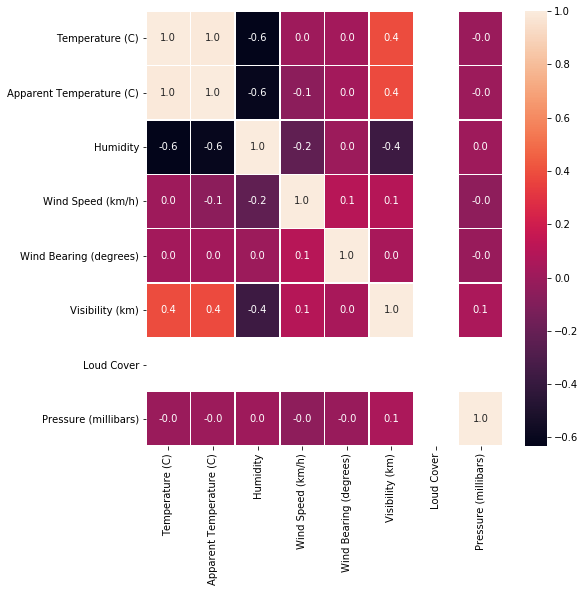

In [15]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(input_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005FA3371148>,
      dtype=object)

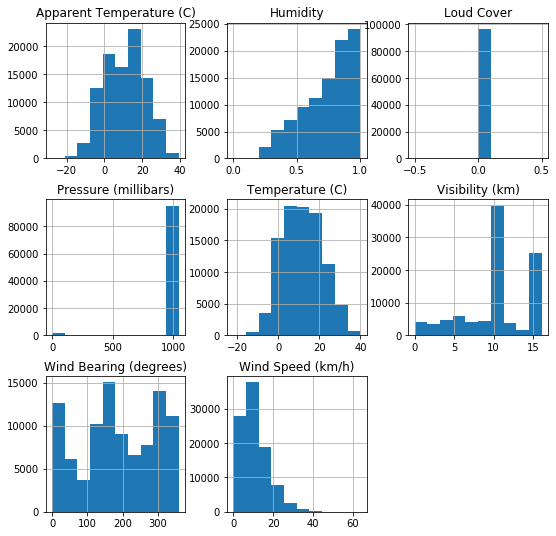

In [16]:
rcParams['figure.figsize'] = 9, 9
input_data[quant_features].hist()

## Display the relation between Humidity & Temperature and plot a graph.

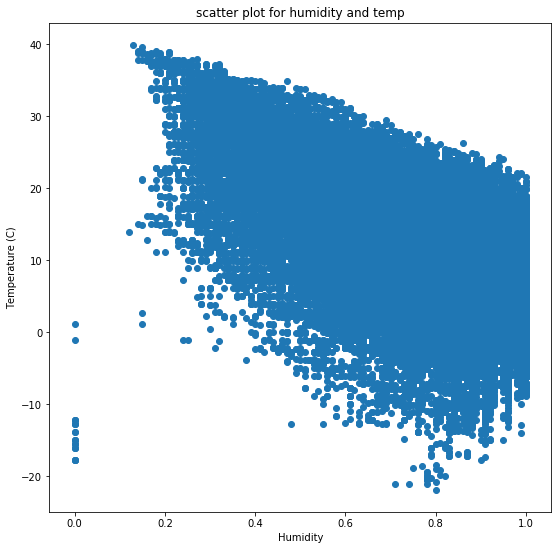

In [17]:
#scatter plot for humidity and temp
plt.scatter(input_data['Humidity'], input_data['Temperature (C)'])
plt.title("scatter plot for humidity and temp")
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
plt.show()

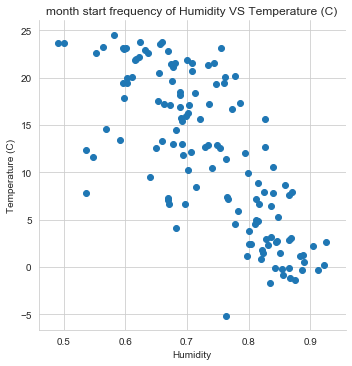

In [18]:
rln_data = ['Humidity','Temperature (C)']
input_data['Formatted Date'] = pd.to_datetime(input_data['Formatted Date'], utc=True)
date_input = input_data.set_index("Formatted Date")
#month start frequency
rln_mean = date_input[rln_data].resample("MS").mean()
sns.set_style("whitegrid")
sns.FacetGrid(rln_mean, height=5).map(plt.scatter, "Humidity", "Temperature (C)")
plt.title("month start frequency of Humidity VS Temperature (C)")
plt.show()

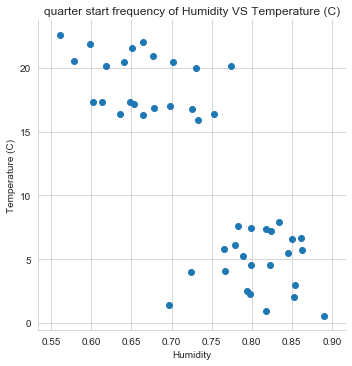

In [19]:
#quarter start frequency
rln_mean = date_input[rln_data].resample("QS").mean()
sns.set_style("whitegrid")
sns.FacetGrid(rln_mean, height=5).map(plt.scatter, "Humidity", "Temperature (C)")
plt.title("quarter start frequency of Humidity VS Temperature (C)")
plt.show()

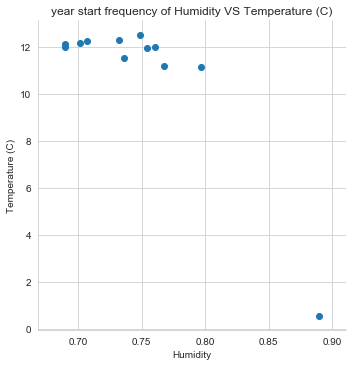

In [20]:
#year start frequency
rln_mean = date_input[rln_data].resample("AS").mean()
sns.set_style("whitegrid")
sns.FacetGrid(rln_mean, height=5).map(plt.scatter, "Humidity", "Temperature (C)")
plt.title("year start frequency of Humidity VS Temperature (C)")
plt.show()

## linear regression model and train it with the temperature and wind speed and predict the humidity

In [21]:
X = input_data[['Temperature (C)','Wind Speed (km/h)']]
y = input_data[['Humidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42,shuffle=True)
lr=LinearRegression()
lr.fit(X_train,y_train)
training_predict = lr.predict(X_train)
print('Training Predicted values :',training_predict)
#Score calculation
print('Train R squared Value (coefficient of determination):', (lr.score(X_train, y_train))*100)

testing_predict = lr.predict(X_test)
print('Testing Predicted values :',testing_predict)
#Score calculation
print('Test  R squared Value(coefficient of determination):', (lr.score(X_test, y_test))*100)
print("--------------------------------------------------------------------")
print('Test DataSet MSE  :', metrics.mean_squared_error(y_test, testing_predict))
print('Test DataSet RMSE :', np.sqrt(metrics.mean_squared_error(y_test, testing_predict)))

print('Train DataSet MSE  :', metrics.mean_squared_error(y_train, training_predict))
print('Train DataSet RMSE :', np.sqrt(metrics.mean_squared_error(y_train, training_predict)))

Training Predicted values : [[0.87424487]
 [0.77249873]
 [0.82315029]
 ...
 [0.81588881]
 [0.7040421 ]
 [0.82490113]]
Train R squared Value (coefficient of determination): 44.60823622320419
Testing Predicted values : [[0.74474678]
 [0.96065281]
 [0.68788105]
 ...
 [0.72779974]
 [0.80816691]
 [0.76432113]]
Test  R squared Value(coefficient of determination): 45.05518020420738
--------------------------------------------------------------------
Test DataSet MSE  : 0.02103550100706954
Test DataSet RMSE : 0.14503620584898635
Train DataSet MSE  : 0.021134079121759974
Train DataSet RMSE : 0.14537564831071254


## linear regression model and train it with the temperature feature and predict the humidity

In [22]:
X = input_data[['Temperature (C)']]
y = input_data[['Humidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42,shuffle=True)
lr=LinearRegression()
lr.fit(X_train,y_train)
training_predict = lr.predict(X_train)
print('Training Predicted values :',training_predict)
#Accuracy calculation
print('Train R squared Value(coefficient of determination):', (lr.score(X_train, y_train))*100)

testing_predict = lr.predict(X_test)
print('Testing Predicted values :',testing_predict)
#Accuracy calculation
print('Test R squared Value(coefficient of determination):', (lr.score(X_test, y_test))*100)
print("--------------------------------------------------------------------")
print('Test DataSet MSE  :', metrics.mean_squared_error(y_test, testing_predict))
print('Test DataSet RMSE :', np.sqrt(metrics.mean_squared_error(y_test, testing_predict)))
print('Train DataSet MSE  :', metrics.mean_squared_error(y_train, training_predict))
print('Train DataSet RMSE :', np.sqrt(metrics.mean_squared_error(y_train, training_predict)))

Training Predicted values : [[0.8759672 ]
 [0.72484391]
 [0.80787553]
 ...
 [0.76923279]
 [0.64202777]
 [0.82511393]]
Train R squared Value(coefficient of determination): 39.86068494792576
Testing Predicted values : [[0.75975167]
 [0.89449848]
 [0.66106184]
 ...
 [0.85571209]
 [0.83265573]
 [0.73669531]]
Test R squared Value(coefficient of determination): 40.165476221047534
--------------------------------------------------------------------
Test DataSet MSE  : 0.022907513208480147
Test DataSet RMSE : 0.15135228180797325
Train DataSet MSE  : 0.022945451741896297
Train DataSet RMSE : 0.15147756184298813
